In [16]:
%matplotlib inline
import pandas as pd

In [4]:
day1_input=pd.read_table('data/day1-input.txt',header=None)

In [58]:
day2 = day1_input.cumsum()
day2.columns = ['sum']

In [59]:
day2.head()

,sum
0,13
1,10
2,2
3,16
4,32


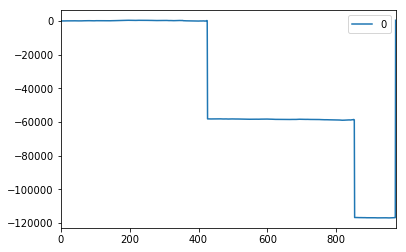

In [38]:
day2.plot(kind='line')

In [39]:
change = day2.iloc[-1:].values[0][0]

In [40]:
change

427

In [64]:
day2['mod']=day2['sum'] % change

In [73]:
mods = day2['mod'].unique()
mods

array([ 13,  10,   2,  16,  32,  25,  28,  21,  30,  20,  36,  49,  61,
        73,  77,  96,  94,  89,  74,  72,  59,  48,  35,  33,  38,  26,
        43,  55,  47,  58,  60,  79,  65,  85,  80,  87,  93, 113, 101,
       108, 111, 103, 100,  84,  69,  70,  54,  57,  46,  64,  50,  40,
        63,  83,  67,  75,  66,  82,  71,  81,  76,  90,  98, 107, 106,
       104, 116, 117, 133, 121, 128, 144, 152, 158, 166, 149, 142, 155,
       173, 188, 181, 165, 177, 170, 167, 150, 147, 140, 148, 135, 131,
       119, 138, 139, 127, 109, 125, 115, 134, 120, 132, 151, 169, 178,
       179, 190, 192, 185, 202, 187, 194, 176, 171, 186, 204, 211, 214,
       222, 224, 239, 236, 254, 237, 226, 215, 219, 230, 212, 198, 205,
       193, 184, 180, 162, 156, 153, 161, 146, 137, 118,  99, 110, 129,
       145, 141, 159, 143, 157, 154, 175, 168, 163, 164, 160, 172, 197,
       201, 217, 203, 213, 209, 229, 238, 243, 234, 220, 221, 241, 260,
       274, 286, 284, 265, 261, 258, 277, 262, 273, 287, 285, 30

In [42]:
from scipy.spatial.distance import squareform, pdist

In [109]:
import numpy as np

all_combo = []
for m in mods:
    sub_data = day2.loc[day2['mod']==m,['sum']]
    distance = pd.DataFrame(squareform(pdist(sub_data)))

    val = distance.stack().reset_index()
    val.columns=['row','col','dist']
    val['row'] = sub_data.index[val['row']]
    val['col'] = sub_data.index[val['col']]
    
    mod = (distance % change).stack().reset_index()
    mod.columns=['row','col','mod']
    mod['row'] = sub_data.index[mod['row']]
    mod['col'] = sub_data.index[mod['col']]
    
    combo = pd.merge(val,mod)
    combo['times'] = combo.dist/change
    
    all_combo.append(combo)
    

In [110]:
all_combo = pd.concat(all_combo, axis=0)

In [115]:
np.min(all_combo['times'])

0.0

In [117]:
new_combo = all_combo[(all_combo['row'] != all_combo['col'])]

In [193]:
final = new_combo[(new_combo['times'] == np.min(new_combo['times']))]
final

,row,col,dist,mod,times
1,0,640,58499.0,0.0,137.0
3,640,0,58499.0,0.0,137.0
5,640,921,58499.0,0.0,137.0
7,921,640,58499.0,0.0,137.0
1,1,724,58499.0,0.0,137.0
3,724,1,58499.0,0.0,137.0
5,724,927,58499.0,0.0,137.0
7,927,724,58499.0,0.0,137.0
1,2,678,58499.0,0.0,137.0
3,678,2,58499.0,0.0,137.0


In [197]:
criteria = (day2.loc[final['row'],['sum']].reset_index(drop=True) == 58499 + day2.loc[final['col'],['sum']].reset_index(drop=True))['sum']
final[criteria.values].sort_values('col')

,row,col,dist,mod,times
1,264,426,58499.0,0.0,137.0
1,266,427,58499.0,0.0,137.0
1,308,428,58499.0,0.0,137.0
1,301,429,58499.0,0.0,137.0
1,307,430,58499.0,0.0,137.0
1,348,431,58499.0,0.0,137.0
1,183,432,58499.0,0.0,137.0
1,344,433,58499.0,0.0,137.0
1,306,434,58499.0,0.0,137.0
1,309,435,58499.0,0.0,137.0


In [198]:
day2.loc[264,'sum'],day2.loc[426,'sum']+58499

(341, 341)

In [186]:
both = zip(day2.loc[final.loc[1,'row'],'sum'],day2.loc[final.loc[1,'col'],'sum']+58499)
for a,b in both:
    print(a,b)

13 13
10 10
2 2
16 16
25 25
28 28
21 21
20 20
36 36
61 61
73 73
96 96
94 94
89 89
74 74
72 72
48 48
33 33
38 38
26 26
43 43
55 55
47 47
58 58
60 60
65 65
80 80
87 87
113 113
101 101
100 100
84 84
54 54
57 57
46 46
64 64
50 50
40 40
83 83
67 67
75 75
66 66
82 82
71 71
81 81
76 76
90 90
98 98
107 107
104 104
117 117
133 133
128 128
152 152
158 158
166 166
149 149
155 155
173 173
188 188
165 165
170 170
167 167
150 150
140 140
148 148
135 135
119 119
127 127
109 109
115 115
134 134
120 120
132 132
169 169
178 178
179 179
190 190
192 192
185 185
194 194
176 176
171 171
186 186
204 204
211 211
222 222
236 236
254 254
237 237
226 226
230 230
184 184
162 162
156 156
153 153
161 161
146 146
129 129
145 145
141 141
159 159
143 143
157 157
154 154
175 175
168 168
163 163
172 172
201 201
209 209
229 229
238 238
243 243
220 220
221 221
260 260
274 274
286 286
284 284
265 265
277 277
262 262
273 273
287 287
285 285
304 304
309 309
306 306
320 320
339 339
343 343
355 355
365 365
350 350
342 342
324 